# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
city_name = []
country = []
date = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Guerrero Negro
Processing Record 2 | Shimoda
Processing Record 3 | Castro
Processing Record 4 | Rikitea
Processing Record 5 | Fukuechō
Processing Record 6 | Hermanus
Processing Record 7 | Busselton
Processing Record 8 | Ryōtsu-minato
Processing Record 9 | Tasiilaq
Processing Record 10 | Pathein
Processing Record 11 | Ushuaia
Processing Record 12 | Oga
Processing Record 13 | Châlons-en-Champagne
Processing Record 14 | Bredasdorp
Processing Record 15 | Holland
Processing Record 16 | Atuona
Processing Record 17 | Dikson
City not found. Skipping...
Processing Record 18 | Progreso
Processing Record 19 | Butaritari
Processing Record 20 | Zambezi
Processing Record 21 | East London
Processing Record 22 | Katsuura
Processing Record 23 | Upernavik
Processing Record 24 | Bluff
Processing Record 25 | Margate
Processing Record 26 | Pohrebyshche
City not found. Skipping...
Processing Record 27 | Cabo San Lucas
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_dict = { 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
 }
#weather_df = pd.DataFrame(weather_dict)
#weath
weather_df = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_df = weather_df.transpose()
weather_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [ ]:
# Display DataFrame
weather_df.head()

In [34]:
weather_df.to_csv("../output_data/cities_csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,71.1,85,9,12.44,MX,1630313036
1,Shimoda,34.6667,138.95,86.36,82,0,13.13,JP,1630313635
2,Castro,-24.7911,-50.0119,49.3,97,82,5.37,BR,1630313635
3,Rikitea,-23.1203,-134.9692,73.83,68,39,17.83,PF,1630313038
4,Fukuechō,32.6881,128.8419,82.76,89,75,9.22,JP,1630313038
...,...,...,...,...,...,...,...,...,...
554,Garden City,42.3256,-83.331,73.42,97,90,5.75,US,1630313725
555,Bambanglipuro,-7.95,110.2833,80.17,73,100,13.44,ID,1630313942
556,Dire Dawa,9.5931,41.8661,88.7,34,78,2.06,ET,1630313943
557,Muros,42.7762,-9.0603,73.99,76,6,1.61,ES,1630313943


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
assert len(weather_df.loc[weather_df["Humidity"] > 100]) == 0

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

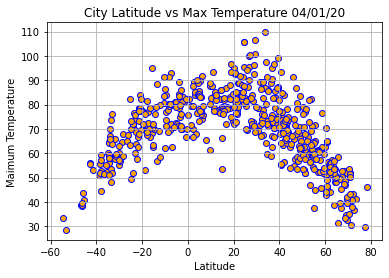

In [49]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="orange", edgecolors = "blue")
plt.xlabel("Latitude")
plt.ylabel("Maimum Temperature")
plt.title("City Latitude vs Max Temperature 04/01/20")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_temperature.png")
plt.show()


## Latitude vs. Humidity Plot

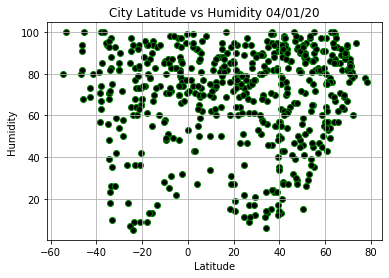

In [53]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="black", edgecolors = "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 04/01/20")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

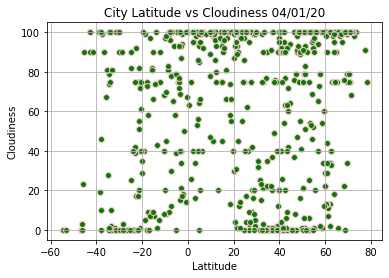

In [52]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="green", edgecolors = "pink")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 04/01/20")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

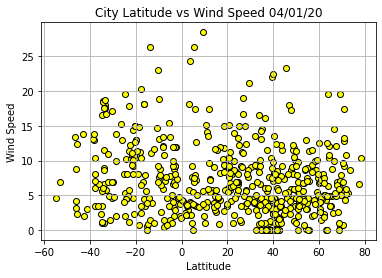

In [51]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="yellow", edgecolors = "black")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 04/01/20")
plt.grid(True)
plt.savefig("../output_data/latitude_vs_wind_speed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


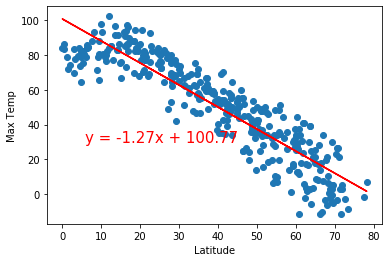

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


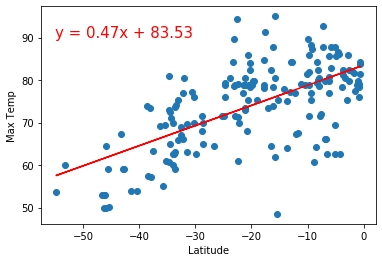

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


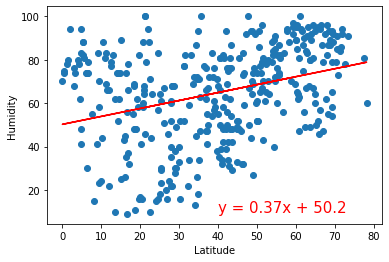

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


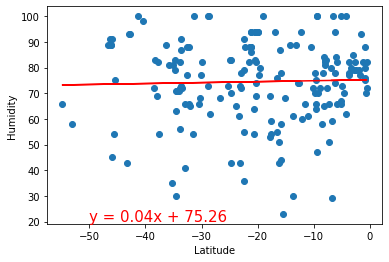

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


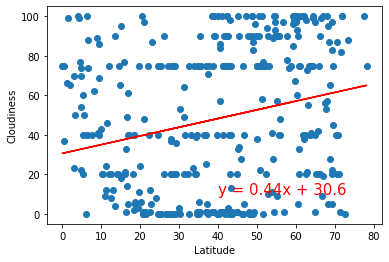

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


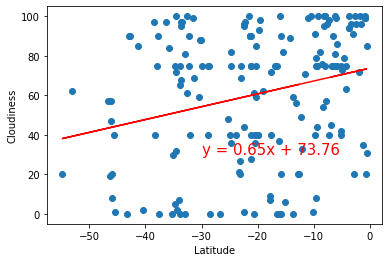

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


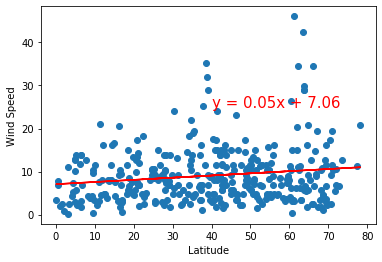

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


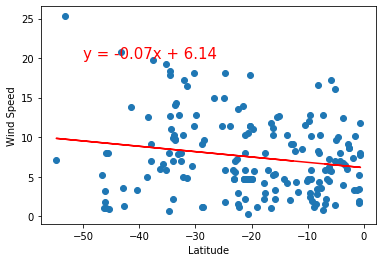